<a href="https://colab.research.google.com/github/avis176/studious-guide/blob/master/NYC_Taxi_Trip_Duration_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

# **Import from local** **drive**

In [4]:
from google.colab import files
uploaded=files.upload()

Saving nyc_taxi_trip_duration.csv to nyc_taxi_trip_duration.csv


In [5]:
df = pd.read_csv(io.StringIO(uploaded['nyc_taxi_trip_duration.csv'].decode('utf-8')))

#Explore *Dataset*

In [6]:
#Check the no. of observations and columns in data:
df.shape

(729322, 11)

In [7]:
print(df.columns.tolist())

['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration']


In [8]:
# Check datatypes in data:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [10]:
#Checking for missing values:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [11]:
# No. of unique_values in each columns:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [12]:
# Check statistical summary:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


# Feature Creation

In [13]:
#Convert pickup time & dropoff time into datetime:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [14]:
# Create new feature from datatime feature:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()

In [15]:
df['pickup_day_no'] = df['pickup_datetime'].dt.weekday
df['dropoff_day_no'] = df['dropoff_datetime'].dt.weekday

In [16]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

In [17]:
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_month'] = df['dropoff_datetime'].dt.month

In [18]:
def time_of_day(x):
  if x in range(6,12):
    return 'Morning'
  elif x in range(12,16):
    return 'Afternoon'
  elif x in range(16,22):
    return 'Evening'
  else:
    return 'Late Night'

In [ ]:
df['pickup_timeofday'] = df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday'] = df['dropoff_hour'].apply(time_of_day)

In [ ]:
#To calculate distance :
from geopy.distance import great_circle

In [ ]:
#Define functions to take coordinates as inputs and returns as distance:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates = (pickup_lat,pickup_long)
  stop_coordinates = (dropoff_lat,dropoff_long)

  return great_circle(start_coordinates,stop_coordinates).km



In [ ]:
df['distance'] = df.apply(lambda x : cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,0,0,16,16,2,2,Evening,Evening,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,4,4,23,23,3,3,Late Night,Late Night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,6,6,17,18,2,2,Evening,Evening,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,1,1,9,10,1,1,Morning,Morning,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,2,2,6,6,2,2,Morning,Morning,4.328540


#Univariate Analysis

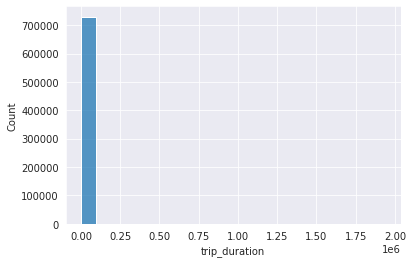

In [ ]:
# Analyzing target variable:
sns.set_style("darkgrid")
sns.histplot(df['trip_duration'],kde=False,bins=20)

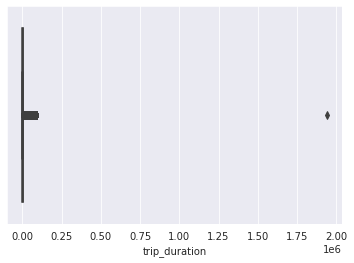

In [ ]:
sns.boxplot(df['trip_duration'])

In [ ]:
df['trip_duration'].sort_values(ascending = False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
312992          1
398887          1
622664          1
323299          1
296874          1
Name: trip_duration, Length: 729322, dtype: int64

In [ ]:
#Dropping the row which contains the outlier.As it's a single observation:
df.drop(df[df['trip_duration']==1939736].index,inplace=True)

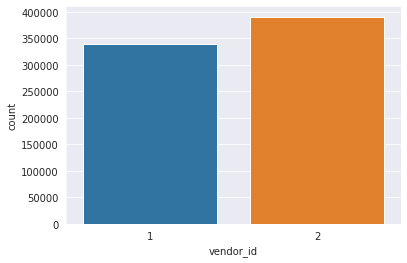

In [ ]:
sns.countplot(df['vendor_id'])

In [ ]:
df['passenger_count'].value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

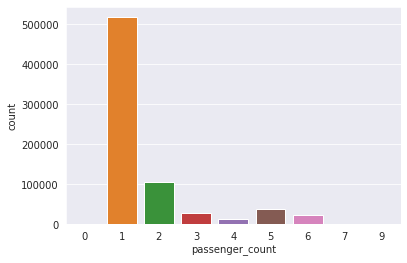

In [ ]:
sns.countplot(x='passenger_count',data=df)

In [ ]:
df=df[df['passenger_count']!=0]
df = df[df['passenger_count']<=6]

In [ ]:
df['passenger_count'].value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [ ]:
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

In [ ]:
df['distance'].value_counts()

0.000000    2893
0.000424      23
0.000424      20
0.000424      19
0.000424      11
            ... 
6.670588       1
1.053985       1
4.718984       1
6.100024       1
1.614936       1
Name: distance, Length: 726218, dtype: int64

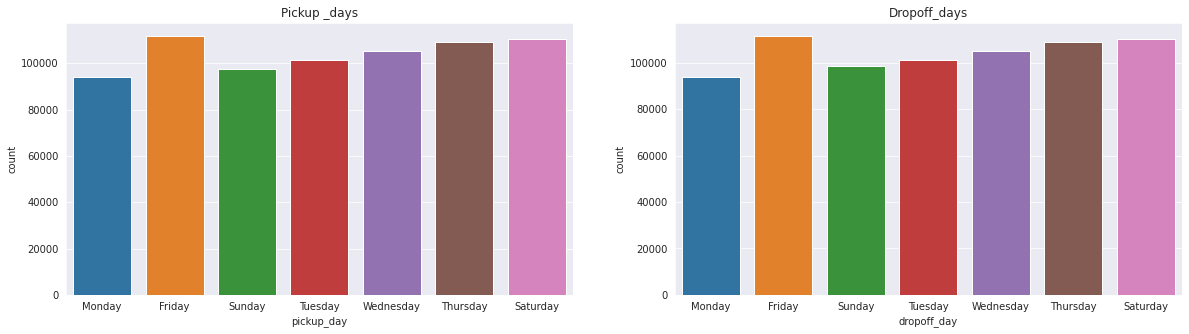

In [ ]:
#Trips per day:
figure,(ax1,ax2)=plt.subplots(ncols = 2,figsize=(20,5))

ax1.set_title('Pickup _days')
ax = sns.countplot(x="pickup_day",data=df,ax=ax1)

ax2.set_title("Dropoff_days")
ax = sns.countplot(x="dropoff_day",data=df,ax=ax2)

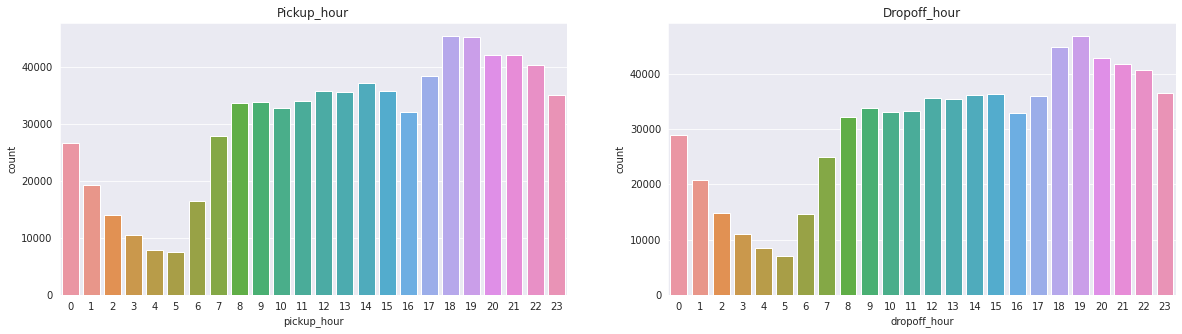

In [ ]:
#Trips per hour:

figure,(ax3,ax4)=plt.subplots(ncols = 2,figsize=(20,5))

ax3.set_title("Pickup_hour")
ax = sns.countplot(x="pickup_hour",data=df,ax=ax3)

ax4.set_title("Dropoff_hour")
ax = sns.countplot(x="dropoff_hour",data=df,ax=ax4)

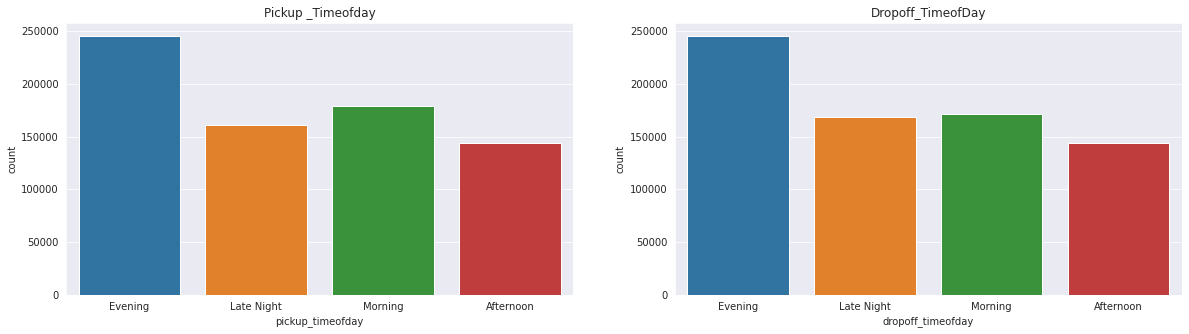

In [ ]:
# Trip per Time of Day:

figure,(ax5,ax6) = plt.subplots(ncols=2,figsize=(20,5))

ax5.set_title('Pickup _Timeofday')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax5)

ax6.set_title("Dropoff_TimeofDay")
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax6)

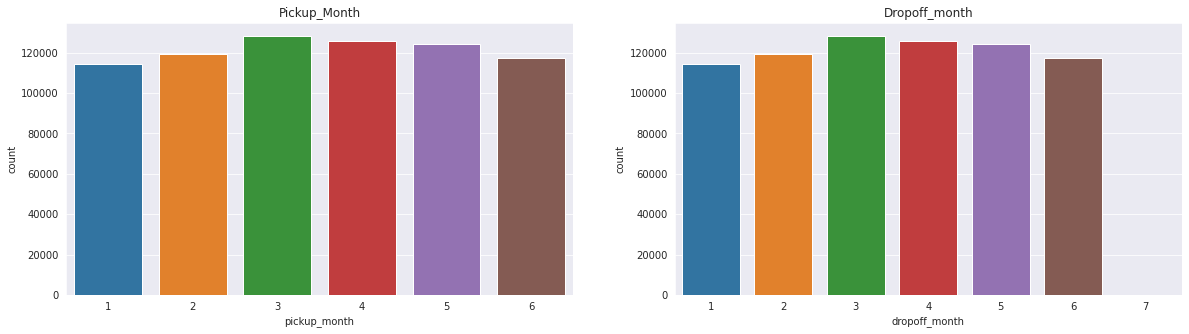

In [ ]:
#Trip per month:
figure,(ax7,ax8)=plt.subplots(ncols = 2,figsize=(20,5))

ax7.set_title("Pickup_Month")
ax = sns.countplot(x="pickup_month",data=df,ax=ax7)

ax8.set_title("Dropoff_month")
ax = sns.countplot(x="dropoff_month",data=df,ax=ax8)

**Bivariate Analysis**

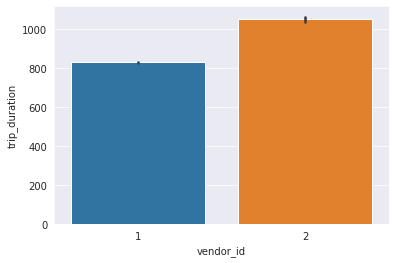

In [ ]:
#Trip duration per vendor:

sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)

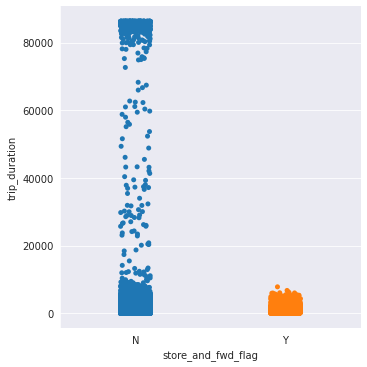

In [ ]:
# Trip duration per store and forward flag:

sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df,kind='strip')

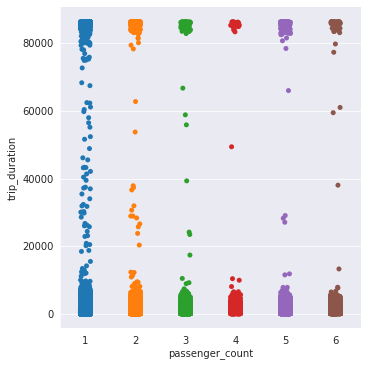

In [ ]:
# Trip duration per passenger_count:

sns.catplot(y="trip_duration",x="passenger_count",data=df,kind="strip")

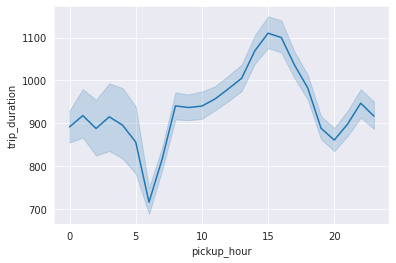

In [ ]:
# Trip duration per hour:

sns.lineplot(x='pickup_hour',y='trip_duration',data=df)

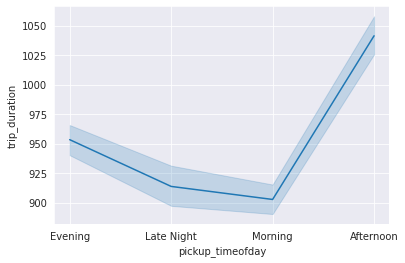

In [ ]:
#Trip duration per time of day:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=df)

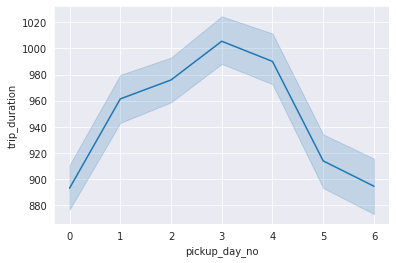

In [ ]:
#Trip duration per day of week:

sns.lineplot(x='pickup_day_no',y='trip_duration',data=df)

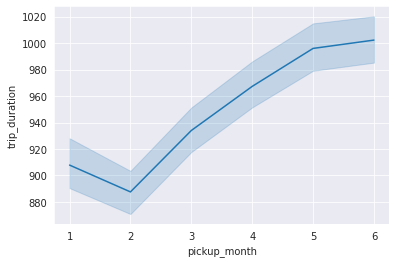

In [ ]:
#Trip duration per month:
sns.lineplot(x = 'pickup_month',y='trip_duration',data=df)

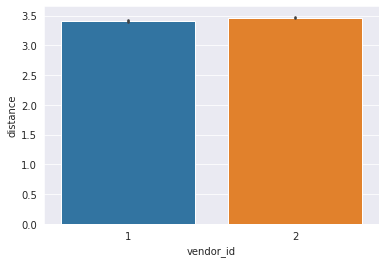

In [ ]:
#Distance and Vendor:

sns.barplot(y='distance',x='vendor_id',data=df,estimator=np.mean)

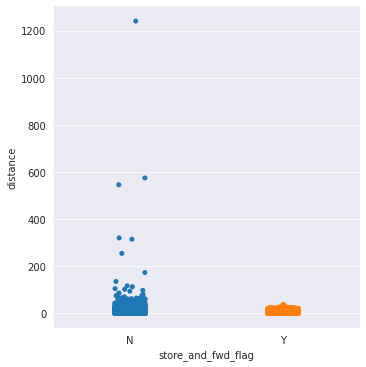

In [ ]:
# Distance and store and forward flag:

sns.catplot(y='distance',x='store_and_fwd_flag',data=df,kind='strip')

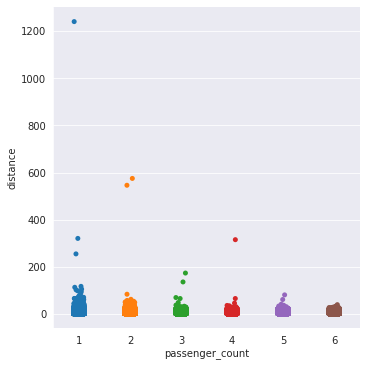

In [ ]:
#Distance per passenger_count:

sns.catplot(y='distance',x='passenger_count',data=df,kind='strip')

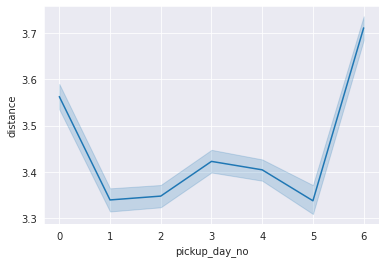

In [ ]:
# Distance per day of the week:


sns.lineplot(x='pickup_day_no',y='distance',data=df)

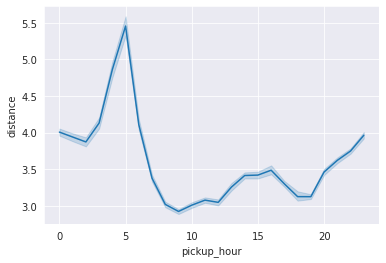

In [ ]:
# Distance per hour of the day :

sns.lineplot(x='pickup_hour',y='distance',data=df)

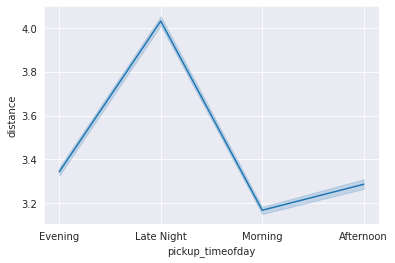

In [ ]:
# Distance per time of the day:

sns.lineplot(x='pickup_timeofday',y='distance',data=df)

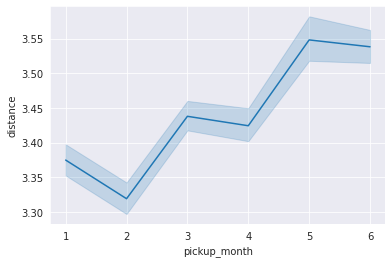

In [ ]:
# Distance per month:

sns.lineplot(x='pickup_month',y='distance',data=df)

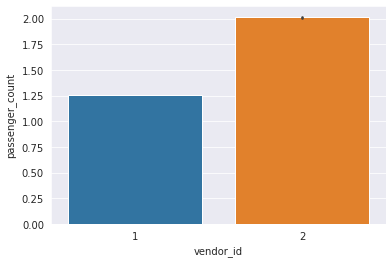

In [ ]:
# passenger count and vendor_id:

sns.barplot(y='passenger_count',x='vendor_id',data=df)

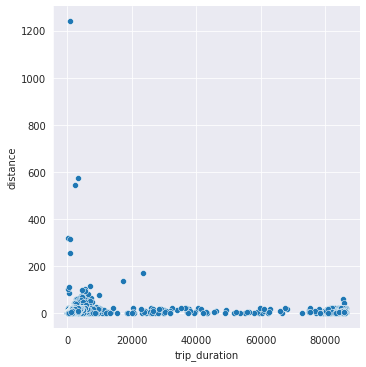

In [ ]:
# Trip duration and distance:

sns.relplot(y='distance',x='trip_duration',data=df)

In [ ]:
df[df['distance']==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,240,Tuesday,Tuesday,1,1,11,11,6,6,Morning,Morning,0.0
327,id0786923,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.996323,40.753460,-73.996323,40.753460,N,159,Saturday,Saturday,5,5,13,13,3,3,Afternoon,Afternoon,0.0
795,id2323213,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.967171,40.763500,-73.967171,40.763500,N,897,Monday,Monday,0,0,16,17,6,6,Evening,Evening,0.0
1176,id3235868,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.995232,40.744038,-73.995232,40.744038,N,256,Monday,Monday,0,0,21,21,2,2,Evening,Evening,0.0
1257,id1865738,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.912781,40.804428,-73.912781,40.804428,N,1330,Sunday,Sunday,6,6,11,12,3,3,Morning,Afternoon,0.0


In [ ]:
df[df['distance']==0].tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
728720,id3423342,2,2016-05-05 21:32:43,2016-05-05 21:32:57,2,-73.977898,40.766392,-73.977898,40.766392,N,14,Thursday,Thursday,3,3,21,21,5,5,Evening,Evening,0.0
728775,id2618105,2,2016-03-13 20:06:40,2016-03-13 20:14:24,1,-73.974258,40.759895,-73.974258,40.759895,N,464,Sunday,Sunday,6,6,20,20,3,3,Evening,Evening,0.0
728838,id1232120,2,2016-05-29 04:04:32,2016-05-29 04:11:33,2,-73.984558,40.750839,-73.984558,40.750839,N,421,Sunday,Sunday,6,6,4,4,5,5,Late Night,Late Night,0.0
729025,id3524028,2,2016-04-06 18:03:34,2016-04-06 18:26:23,1,-74.083611,40.632401,-74.083611,40.632401,N,1369,Wednesday,Wednesday,2,2,18,18,4,4,Evening,Evening,0.0
729308,id3477255,2,2016-01-20 08:22:38,2016-01-20 08:47:35,1,-73.977859,40.749538,-73.977859,40.749538,N,1497,Wednesday,Wednesday,2,2,8,8,1,1,Morning,Morning,0.0
